# Size Monotone/Fidelity Testing Script

This script tests the trained ICCNet/FidNet models with unseen datasets and plots the figures for the manuscript. It is better to run this script from the top down.

### Loads packages.

In [1]:
import scipy.io as spi
import h5py, hdf5storage
import numpy as np
import os

import tensorflow as tf
import numpy as np
import json
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, merge, Input, ZeroPadding2D, Activation, Add, AveragePooling2D
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Sequential, load_model, Model
from keras import optimizers, regularizers
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

K.clear_session()

/home/ys_teo/ysteo-tensorflow_old/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ys_teo/ysteo-tensorflow_old/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ys_teo/ysteo-tensorflow_old/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ys_teo/ysteo-tensorflow_old/lib/python3.5/s

### ICCNet and FidNet training and validation losses

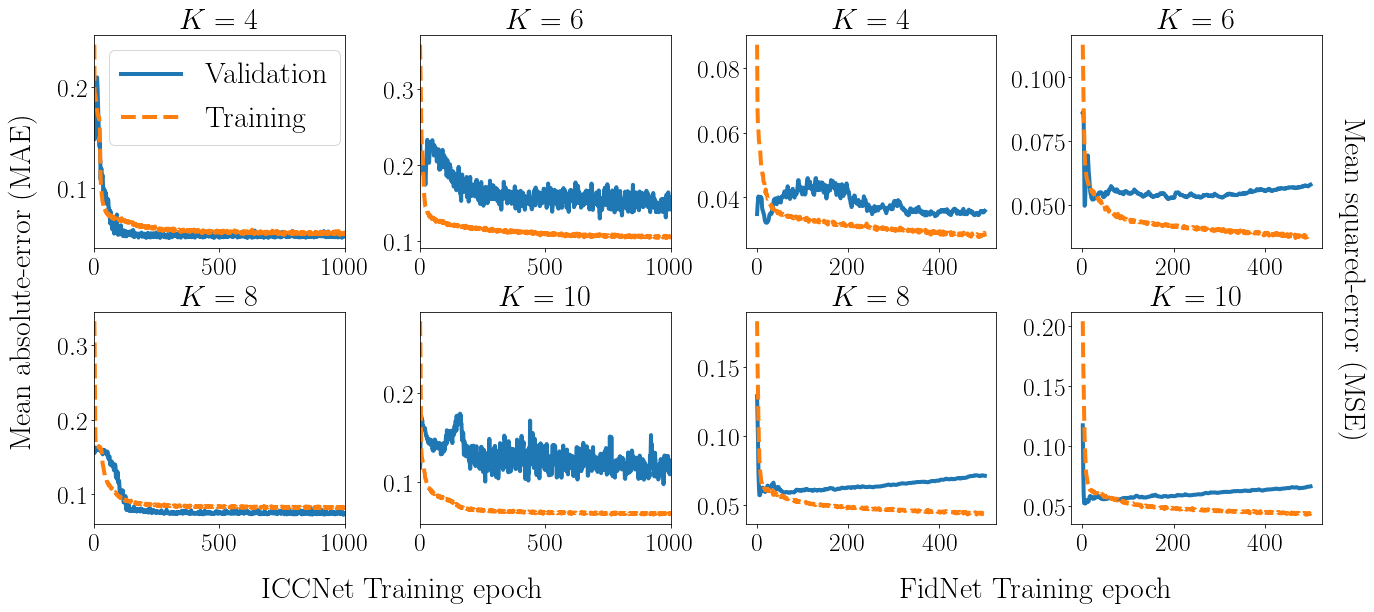

In [2]:
m=4000 # number of training datasets
work_dir='../training/'+str(m)+'_perf_noisy_ex/ICCNet_trained_files/' # directory to trained ICCNet files
epochs1 = 1000 # epoch length of ICCNet training

Kvec=[4,6,8,10] # choice of K to present.
hist_dict={};

for l in range(4):
    Kbas=Kvec[l]
    if Kbas<9:
        Xy_dict = spi.loadmat(work_dir+"model_ICCNet_K_"+str(Kbas)+"_Xy.mat")    
    else:
        Xy_dict = hdf5storage.loadmat(work_dir+"model_ICCNet_K_"+str(Kbas)+"_Xy.mat") # due to large MAT filesize

    with open(work_dir+"model_ICCNet_K_"+str(Kbas)+"_hist.txt") as json_file:  
            history_ld = json.load(json_file)
            
    hist_dict['K'+str(Kbas)]=history_ld

work_dir2='../training/'+str(m)+'_perf_noisy_ex/FidNet_trained_files/' # directory to trained FidNet files
epochs2 = 500 # epoch length of FidNet training

Kvec=[4,6,8,10] # choice of K to present.
hist_dict2={};

for l in range(4):
    Kbas=Kvec[l]
    if Kbas<9:
        Xy_dict = spi.loadmat(work_dir2+"model_FidNet_K_"+str(Kbas)+"_Xy.mat")    
    else:
        Xy_dict = hdf5storage.loadmat(work_dir2+"model_FidNet_K_"+str(Kbas)+"_Xy.mat") # due to large MAT filesize

    with open(work_dir2+"model_FidNet_K_"+str(Kbas)+"_hist.txt") as json_file:  
            history_ld = json.load(json_file)
            
    hist_dict2['K'+str(Kbas)]=history_ld

# plots the training and validation graphs for both nets
    
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labsze=25.5
fntsze=30

fig,ax = plt.subplots(2,4,figsize=(22,9))

plt.subplots_adjust(wspace=0.3, hspace=0.3)

epochs=epochs1

plt.subplot(2, 4, 1)
history_ld=hist_dict['K'+str(Kvec[0])]
plt.plot(np.linspace(1,epochs,epochs),history_ld['val_loss'],'-',linewidth=4.0)
plt.plot(np.linspace(1,epochs,epochs),history_ld['loss'],'--',linewidth=4.0)
plt.title(r'$K='+str(Kvec[0])+'$',fontsize=fntsze)
plt.xlim([0.9,epochs])
plt.xscale('linear')
plt.yscale('linear')
plt.legend([r'Validation',r'Training'],loc='best',fontsize=fntsze)
plt.tick_params(labelsize=labsze)

plt.subplot(2, 4, 2)
history_ld=hist_dict['K'+str(Kvec[1])]
plt.plot(np.linspace(1,epochs,epochs),history_ld['val_loss'],'-',linewidth=4.0)
plt.plot(np.linspace(1,epochs,epochs),history_ld['loss'],'--',linewidth=4.0)
plt.title(r'$K='+str(Kvec[1])+'$',fontsize=fntsze)
plt.xlim([0.9,epochs])
plt.xscale('linear')
plt.yscale('linear')
plt.tick_params(labelsize=labsze)

plt.subplot(2, 4, 5)
history_ld=hist_dict['K'+str(Kvec[2])]
plt.plot(np.linspace(1,epochs,epochs),history_ld['val_loss'],'-',linewidth=4.0)
plt.plot(np.linspace(1,epochs,epochs),history_ld['loss'],'--',linewidth=4.0)
plt.title(r'$K='+str(Kvec[2])+'$',fontsize=fntsze)
plt.xlim([0.9,epochs])
plt.xscale('linear')
plt.yscale('linear')
plt.tick_params(labelsize=labsze)

plt.subplot(2, 4, 6)
history_ld=hist_dict['K'+str(Kvec[3])]
plt.plot(np.linspace(1,epochs,epochs),history_ld['val_loss'],'-',linewidth=4.0)
plt.plot(np.linspace(1,epochs,epochs),history_ld['loss'],'--',linewidth=4.0)
plt.title(r'$K='+str(Kvec[3])+'$',fontsize=fntsze)
plt.xlim([0.9,epochs])
plt.xscale('linear')
plt.yscale('linear')
plt.tick_params(labelsize=labsze)

fig.text(0.32, 0.01, r'ICCNet Training epoch', ha='center',fontsize=fntsze)
fig.text(0.07, 0.5, r'Mean absolute-error (MAE)', va='center', rotation='vertical',fontsize=fntsze)

epochs=epochs2

plt.subplot(2, 4, 3)
history_ld=hist_dict2['K'+str(Kvec[0])]
plt.plot(np.linspace(1,epochs,epochs),history_ld['val_loss'],'-',linewidth=4.0)
plt.plot(np.linspace(1,epochs,epochs),history_ld['loss'],'--',linewidth=4.0)
plt.title(r'$K='+str(Kvec[0])+'$',fontsize=fntsze)
plt.xscale('linear')
plt.yscale('linear')
plt.tick_params(labelsize=labsze)

plt.subplot(2, 4, 4)
history_ld=hist_dict2['K'+str(Kvec[1])]
plt.plot(np.linspace(1,epochs,epochs),history_ld['val_loss'],'-',linewidth=4.0)
plt.plot(np.linspace(1,epochs,epochs),history_ld['loss'],'--',linewidth=4.0)
plt.title(r'$K='+str(Kvec[1])+'$',fontsize=fntsze)
plt.xscale('linear')
plt.yscale('linear')
plt.tick_params(labelsize=labsze)

plt.subplot(2, 4, 7)
history_ld=hist_dict2['K'+str(Kvec[2])]
plt.plot(np.linspace(1,epochs,epochs),history_ld['val_loss'],'-',linewidth=4.0)
plt.plot(np.linspace(1,epochs,epochs),history_ld['loss'],'--',linewidth=4.0)
plt.title(r'$K='+str(Kvec[2])+'$',fontsize=fntsze)
plt.xscale('linear')
plt.yscale('linear')
plt.tick_params(labelsize=labsze)

plt.subplot(2, 4, 8)
history_ld=hist_dict2['K'+str(Kvec[3])]
plt.plot(np.linspace(1,epochs,epochs),history_ld['val_loss'],'-',linewidth=4.0)
plt.plot(np.linspace(1,epochs,epochs),history_ld['loss'],'--',linewidth=4.0)
plt.title(r'$K='+str(Kvec[3])+'$',fontsize=fntsze)
plt.xscale('linear')
plt.yscale('linear')
plt.tick_params(labelsize=labsze)

fig.text(0.72, 0.01, r'FidNet Training epoch', ha='center',fontsize=fntsze)
fig.text(0.91, 0.5, r'Mean squared-error (MSE)', va='center', rotation='-90',fontsize=fntsze)

plt.savefig("../training/Fig_ICCNet_FidNet_train_val.pdf", format='pdf', dpi=1000, bbox_inches='tight')

plt.show()

### $s_\textsc{cvx}$ prediction with unseen simulated test datasets for both ACT and random Haar schemes.

In [17]:
import time

m=4000 # Sets number of training datasets
work_dir='../training/'+str(m)+'_perf_noisy_ex/ICCNet_trained_files/' # Directory to FidNet trained files
num_rnks=3 # Sets rank limit.
test_dim=16 # Sets Hilbert-space dimension
num_test_ex=50 # Sets number of test datasets

labels={'0':'_Haar_N_1000','1':'_Haar','2':'_ACT_N_1000','3':'_ACT'}

for J in range(4):
    
    test_dir='../raw_test_examples/test_ex'+labels[str(J)]

    Y_dict={}
    Y_pred_dict={}

    Y=np.ones((num_test_ex,1))
    Y_pred=np.ones((num_test_ex,1))
    

    for l in range(num_rnks):
        rnk=l+1
        Y_dict['rnk_'+str(rnk)]=Y
        Y_pred_dict['rnk_'+str(rnk)]=Y_pred

    for k in np.array(np.linspace(2,10,9).astype('int64')):
        
        print('ex{}: K = {}'.format(labels[str(J)],k))

        Xy_dict = spi.loadmat(work_dir+"model_ICCNet_K_"+str(k)+"_Xy.mat")    
        X_orig = Xy_dict['x_train0']

        # Loads FidNet model for a given K.
        K.clear_session()
        model_ld = load_model(work_dir+"model_ICCNet_K_"+str(k)+".h5")

        start_time = time.time()
        for l in range(num_rnks):

            rnk=l+1
            print('processing rnk-{} data...'.format(rnk),end='')

            # Loads and preprocesses the test input X matrix into a single-channel image.
            X=spi.loadmat(test_dir+'_rnk_'+str(rnk)+'/D'+str(test_dim)+'/proc_data/'+str(num_test_ex)+'_ex/X_'+str(k)+'.mat')['X']       
            X=X[:,0:k*(test_dim**2+test_dim)]
            X_test=preprocessing.StandardScaler().fit(X_orig).transform(X)

            img_rows = int(np.ceil(np.power(X_test.shape[1],0.5)))
            img_cols = img_rows
            X_test = np.concatenate((X_test,np.zeros((X_test.shape[0],img_rows*img_cols-X_test.shape[1]))),axis=1)
            X_test=X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)        

            # Loads and stores test fidelity values.
            y_cont=np.abs(spi.loadmat(test_dir+'_rnk_'+str(rnk)+'/D'+str(test_dim)+'/proc_data/'+str(num_test_ex)+'_ex/y_cont_'+str(k)+'.mat')['y_cont'])
            y_cont=np.abs(y_cont[0:num_test_ex,0]).reshape([num_test_ex,1])
            
            # Predicts and stores the test fidelity values.
            y_pred = model_ld.predict(X_test)
            y_pred = np.power(10,-10*y_pred)
            
            if k==1:
                Y_dict['rnk_'+str(rnk)]=y_cont
                Y_pred_dict['rnk_'+str(rnk)]=y_pred
            else:
                Y_dict['rnk_'+str(rnk)]=np.concatenate((Y_dict['rnk_'+str(rnk)],y_cont),axis=1)  
                Y_pred_dict['rnk_'+str(rnk)]=np.concatenate((Y_pred_dict['rnk_'+str(rnk)],y_pred),axis=1)
                
            print('done!')
    
    spi.savemat(work_dir+"model_ICCNet_scvx"+labels[str(J)]+".mat", Y_dict)
    spi.savemat(work_dir+"model_ICCNet_scvx_pred"+labels[str(J)]+".mat", Y_pred_dict)

ex_Haar_N_1000: K = 2
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 3
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 4
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 5
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 6
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 7
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 8
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 9
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 10
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data

### Fidelity prediction with unseen simulated test datasets for both ACT and random Haar schemes.

In [6]:
import time

m=4000 # Sets number of training datasets
work_dir='../training/'+str(m)+'_perf_noisy_ex/FidNet_trained_files/' # Directory to FidNet trained files
num_rnks=3 # Sets rank limit.
test_dim=16 # Sets Hilbert-space dimension
num_test_ex=50 # Sets number of test datasets

labels={'0':'_Haar_N_1000','1':'_Haar','2':'_ACT_N_1000','3':'_ACT'}

for J in range(4):
    
    test_dir='../raw_test_examples/test_ex'+labels[str(J)]

    Y_dict={}
    Y_pred_dict={}

    Y=np.ones((num_test_ex,1))
    Y_pred=np.ones((num_test_ex,1))
    

    for l in range(num_rnks):
        rnk=l+1
        Y_dict['rnk_'+str(rnk)]=Y
        Y_pred_dict['rnk_'+str(rnk)]=Y_pred

    for k in np.array(np.linspace(1,10,10).astype('int64')):
        
        print('ex{}: K = {}'.format(labels[str(J)],k))

        Xy_dict = spi.loadmat(work_dir+"model_FidNet_K_"+str(k)+"_Xy.mat")    
        X_orig = Xy_dict['x_train0']

        # Loads FidNet model for a given K.
        K.clear_session()
        model_ld = load_model(work_dir+"model_FidNet_K_"+str(k)+".h5")

        start_time = time.time()
        for l in range(num_rnks):

            rnk=l+1
            print('processing rnk-{} data...'.format(rnk),end='')

            # Loads and preprocesses the test input X matrix into a single-channel image.
            X=spi.loadmat(test_dir+'_rnk_'+str(rnk)+'/D'+str(test_dim)+'/proc_data/'+str(num_test_ex)+'_ex/X_'+str(k)+'.mat')['X']       
            X_test=preprocessing.StandardScaler().fit(X_orig).transform(X)

            img_rows = int(np.ceil(np.power(X_test.shape[1],0.5)))
            img_cols = img_rows
            X_test = np.concatenate((X_test,np.zeros((X_test.shape[0],img_rows*img_cols-X_test.shape[1]))),axis=1)
            X_test=X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)        

            # Loads and stores test fidelity values.
            y_cont=np.abs(spi.loadmat(test_dir+'_rnk_'+str(rnk)+'/D'+str(test_dim)+'/proc_data/'+str(num_test_ex)+'_ex/y_cont_'+str(k)+'.mat')['y_cont'])
            y_cont=np.abs(y_cont[0:num_test_ex,1]).reshape([num_test_ex,1])
            
            # Predicts and stores the test fidelity values.
            y_pred = model_ld.predict(X_test)
            
            if k==1:
                Y_dict['rnk_'+str(rnk)]=y_cont
                Y_pred_dict['rnk_'+str(rnk)]=y_pred
            else:
                Y_dict['rnk_'+str(rnk)]=np.concatenate((Y_dict['rnk_'+str(rnk)],y_cont),axis=1)  
                Y_pred_dict['rnk_'+str(rnk)]=np.concatenate((Y_pred_dict['rnk_'+str(rnk)],y_pred),axis=1)
                
            print('done!')
    
    spi.savemat(work_dir+"model_FidNet_fid"+labels[str(J)]+".mat", Y_dict)
    spi.savemat(work_dir+"model_FidNet_fid_pred"+labels[str(J)]+".mat", Y_pred_dict)

ex_Haar_N_1000: K = 1
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 2
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 3
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 4
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 5
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 6
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 7
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 8
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data...done!
ex_Haar_N_1000: K = 9
processing rnk-1 data...done!
processing rnk-2 data...done!
processing rnk-3 data.

### Plots all results in one figure.

rnk-1 noiseless -log-scvx:
actual: [-0.    0.22  0.87  3.89  6.25  6.91  7.31  7.57  7.83  7.88]
pred: [-0.    0.18  0.62  3.76  4.7   5.06  5.18  7.56  7.56  7.13]
avg. mae: [0.   0.05 0.29 1.27 1.61 1.85 2.12 0.51 0.64 0.97]
rnk-1 noisy -log-scvx:
actual: [-0.    0.22  2.    4.34  4.72  5.83  6.18  7.7   8.28  8.51]
pred: [-0.    0.18  0.59  4.08  4.84  5.23  5.24  7.64  7.54  7.29]
avg. mae: [0.   0.05 1.44 0.37 0.31 1.13 1.15 0.38 0.83 1.31]
rnk-2 noiseless -log-scvx:
actual: [-0.    0.1   0.24  0.48  0.86  2.3   5.43  6.56  6.96  7.33]
pred: [-0.    0.11  0.24  0.62  1.32  1.48  4.32  5.16  5.67  5.5 ]
avg. mae: [0.   0.02 0.04 0.18 0.6  1.03 1.23 1.49 1.29 1.83]
rnk-2 noisy -log-scvx:
actual: [-0.    0.11  0.28  0.93  3.15  4.39  4.62  5.16  6.37  7.16]
pred: [-0.    0.12  0.26  0.74  1.58  1.78  4.35  5.4   5.89  5.55]
avg. mae: [0.   0.03 0.06 0.57 1.89 2.61 0.28 0.77 1.05 1.72]
rnk-3 noiseless -log-scvx:
actual: [-0.    0.08  0.18  0.31  0.48  0.73  1.15  2.52  5.14  6.46]
pre

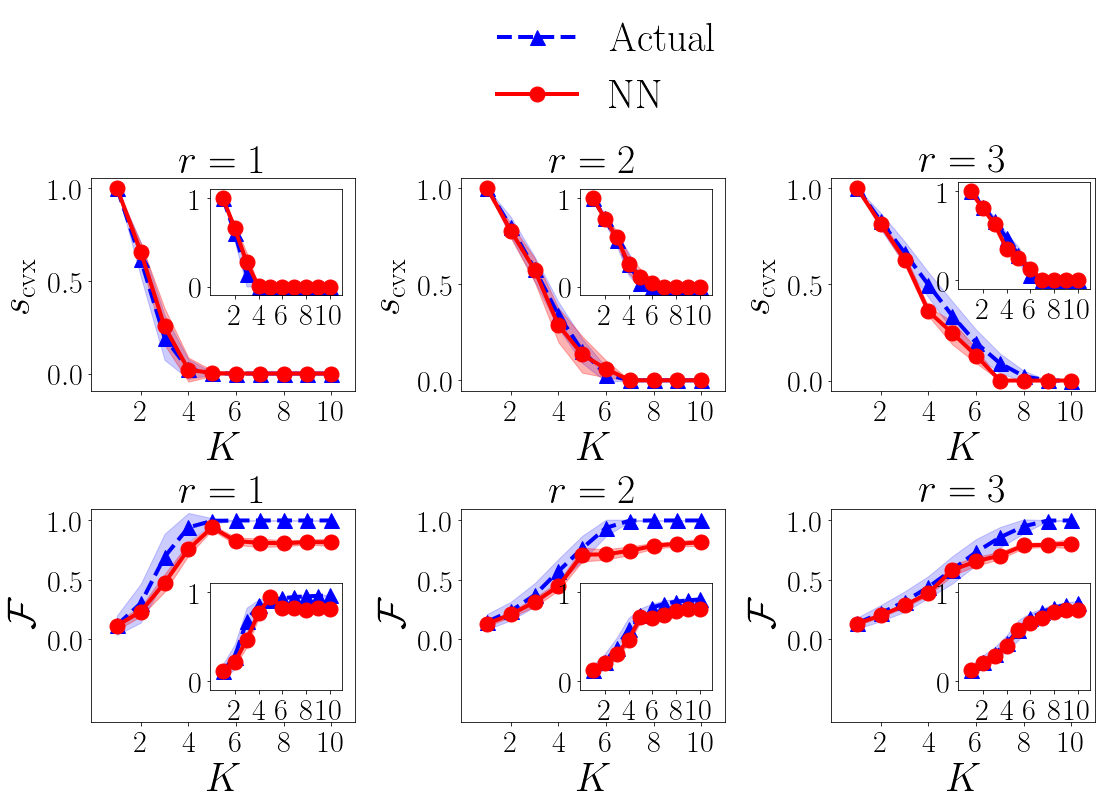

In [20]:
m=4000 # number of training examples
work_dir='../training/'+str(m)+'_perf_noisy_ex/ICCNet_trained_files/' # Directory to ICCNet trained files
work_dir_fid='../training/'+str(m)+'_perf_noisy_ex/FidNet_trained_files/' # Directory to FidNet trained files

rand_or_ACT=1

if rand_or_ACT==1:
    Y_dict=spi.loadmat(work_dir+"model_ICCNet_scvx_Haar.mat")
    Y_pred_dict=spi.loadmat(work_dir+"model_ICCNet_scvx_pred_Haar.mat")

    Y_dict_N=spi.loadmat(work_dir+"model_ICCNet_scvx_Haar_N_1000.mat")
    Y_pred_dict_N=spi.loadmat(work_dir+"model_ICCNet_scvx_pred_Haar_N_1000.mat")
    
    Y_fid_dict=spi.loadmat(work_dir_fid+"model_FidNet_fid_Haar.mat")
    Y_fid_pred_dict=spi.loadmat(work_dir_fid+"model_FidNet_fid_pred_Haar.mat")

    Y_fid_dict_N=spi.loadmat(work_dir_fid+"model_FidNet_fid_Haar_N_1000.mat")
    Y_fid_pred_dict_N=spi.loadmat(work_dir_fid+"model_FidNet_fid_pred_Haar_N_1000.mat")
    
else:
    Y_dict=spi.loadmat(work_dir+"model_ICCNet_scvx_ACT.mat")
    Y_pred_dict=spi.loadmat(work_dir+"model_ICCNet_scvx_pred_ACT.mat")

    Y_dict_N=spi.loadmat(work_dir+"model_ICCNet_scvx_ACT_N_1000.mat")
    Y_pred_dict_N=spi.loadmat(work_dir+"model_ICCNet_scvx_pred_ACT_N_1000.mat")
    
    Y_fid_dict=spi.loadmat(work_dir_fid+"model_FidNet_fid_ACT.mat")
    Y_fid_pred_dict=spi.loadmat(work_dir_fid+"model_FidNet_fid_pred_ACT.mat")

    Y_fid_dict_N=spi.loadmat(work_dir_fid+"model_FidNet_fid_ACT_N_1000.mat")
    Y_fid_pred_dict_N=spi.loadmat(work_dir_fid+"model_FidNet_fid_pred_ACT_N_1000.mat")
    
xrng=np.arange(10)+1

labsze=30
fntsze=40

fig = plt.figure(1,figsize=(18,10))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.subplots_adjust(wspace=0.4, hspace=0.55)

for idx in range(3):
    Y1=Y_dict['rnk_'+str(idx+1)]
    Y1_pred=Y_pred_dict['rnk_'+str(idx+1)]
    scvx=np.mean(Y1,axis=0)
    scvx_err=np.sqrt(np.var(Y1,axis=0))
    scvx_pred=np.mean(Y1_pred,axis=0)
    scvx_pred_err=np.sqrt(np.var(Y1_pred,axis=0))
    
    print('rnk-{} noiseless -log-scvx:'.format(idx+1))
    print('actual: {}'.format(np.round(-np.mean(np.log10(Y1),axis=0),2)))
    print('pred: {}'.format(np.round(-np.mean(np.log10(Y1_pred),axis=0),2)))
    print('avg. mae: {}'.format(np.round(np.mean(np.abs(-np.log10(Y1_pred)+np.log10(Y1)),axis=0),2)))       

    Y1_N=Y_dict_N['rnk_'+str(idx+1)]
    Y1_pred_N=Y_pred_dict_N['rnk_'+str(idx+1)]
    scvx_N=np.mean(Y1_N,axis=0)
    scvx_err_N=np.sqrt(np.var(Y1_N,axis=0))
    scvx_pred_N=np.mean(Y1_pred_N,axis=0)
    scvx_pred_err_N=np.sqrt(np.var(Y1_pred_N,axis=0))
    
    print('rnk-{} noisy -log-scvx:'.format(idx+1))
    print('actual: {}'.format(np.round(-np.mean(np.log10(Y1_N),axis=0),2)))
    print('pred: {}'.format(np.round(-np.mean(np.log10(Y1_pred_N),axis=0),2)))
    print('avg. mae: {}'.format(np.round(np.mean(np.abs(-np.log10(Y1_pred_N)+np.log10(Y1_N)),axis=0),2)))   
    
    ax1 = fig.add_subplot(2,3,idx+1)
    if idx==1:
        ax1.plot(xrng,scvx,'b^--',linewidth=4.0,markersize=15.0,label='Actual')
    else:
        ax1.plot(xrng,scvx,'b^--',linewidth=4.0,markersize=15.0)
        
    ax1.fill_between(xrng,scvx-scvx_err,scvx+scvx_err, interpolate=False,color='b',alpha=0.2)
    
    if idx==1:
        ax1.plot(xrng,scvx_pred,'ro-',linewidth=4.0,markersize=15.0,label='NN')
    else:
        ax1.plot(xrng,scvx_pred,'ro-',linewidth=4.0,markersize=15.0)
            
    ax1.fill_between(xrng,scvx_pred-scvx_pred_err,scvx_pred+scvx_pred_err, interpolate=False,color='r',alpha=0.3)
    
    ax1.set_xlim([-0.1,11])
    ax1.set_xlabel(r'$K$',fontsize=fntsze)
    ax1.set_ylabel(r'$s_\mathrm{cvx}$',fontsize=fntsze)
    if idx==1:
        ax1.legend(loc=1,bbox_to_anchor=(1.1,1.9),fontsize=fntsze,frameon=False)
    ax1.set_xticks([2,4,6,8,10])  
    ax1.set_yticks([0,0.5,1])  
    ax1.set_title(r'$r='+str(idx+1)+'$',fontsize=fntsze)

    plt.tick_params(labelsize=labsze)

    ax2 = inset_axes(ax1, width="50%",  height="50%")
    if idx==0 or idx==1:
        ip = InsetPosition(ax1, [0.45,0.45,0.5,0.5])
    else:
        ip = InsetPosition(ax1, [0.48,0.48,0.5,0.5])
    ax2.set_axes_locator(ip)

    ax2.plot(xrng,scvx_N,'b^--',linewidth=4.0,markersize=15.0)
    ax2.fill_between(xrng,scvx_N-scvx_err_N,scvx_N+scvx_err_N, interpolate=False,color='b',alpha=0.2)
    ax2.plot(xrng,scvx_pred_N,'ro-',linewidth=4.0,markersize=15.0)
    ax2.fill_between(xrng,scvx_pred_N-scvx_pred_err_N,scvx_pred_N+scvx_pred_err_N, interpolate=False,color='r',alpha=0.3)
    ax2.set_xticks([2,4,6,8,10])   
    ax2.set_yticks([0,0.5,1])
    ax2.set_xlim([-0.1,11])
    ax2.set_ylim([-0.1,1.1])
    ax2.set_yscale('linear')
        
    plt.tick_params(labelsize=labsze)
    
for idx in range(3):
    Y=Y_fid_dict['rnk_'+str(idx+1)]
    Y_pred=Y_fid_pred_dict['rnk_'+str(idx+1)]
    fid=np.mean(Y,axis=0)
    fid_err=np.sqrt(np.var(Y,axis=0))
    fid_pred=np.mean(Y_pred,axis=0)
    fid_pred_err=np.sqrt(np.var(Y_pred,axis=0))
    
    print('rnk-{} noiseless F'.format(idx+1))
    print('actual: {}'.format(np.round(np.mean(np.abs(Y),axis=0),2)))
    print('pred: {}'.format(np.round(np.mean(np.abs(Y_pred),axis=0),2)))
    print('avg. mae: {}'.format(np.round(np.mean(np.abs(Y_pred-Y),axis=0),2)))

    Y_N=Y_fid_dict_N['rnk_'+str(idx+1)]
    Y_pred_N=Y_fid_pred_dict_N['rnk_'+str(idx+1)]
    fid_N=np.mean(Y_N,axis=0)
    fid_err_N=np.sqrt(np.var(Y_N,axis=0))
    fid_pred_N=np.mean(Y_pred_N,axis=0)
    fid_pred_err_N=np.sqrt(np.var(Y_pred_N,axis=0))
    
    print('rnk-{} noisy F'.format(idx+1))
    print('actual: {}'.format(np.round(np.mean(np.abs(Y_N),axis=0),2)))
    print('pred: {}'.format(np.round(np.mean(np.abs(Y_pred_N),axis=0),2)))
    print('avg. mae: {}'.format(np.round(np.mean(np.abs(Y_pred_N-Y_N),axis=0),2)))

    ax1 = fig.add_subplot(2,3,idx+4)
    if idx==1:
        ax1.plot(xrng,fid,'b^--',linewidth=4.0,markersize=15.0,label='Actual')
    else:
        ax1.plot(xrng,fid,'b^--',linewidth=4.0,markersize=15.0)
        
    ax1.fill_between(xrng,fid-fid_err,fid+fid_err, interpolate=False,color='b',alpha=0.2)
    
    if idx==1:
        ax1.plot(xrng,fid_pred,'ro-',linewidth=4.0,markersize=15.0,label='NN')
    else:
        ax1.plot(xrng,fid_pred,'ro-',linewidth=4.0,markersize=15.0)
            
    ax1.fill_between(xrng,fid_pred-fid_pred_err,fid_pred+fid_pred_err, interpolate=False,color='r',alpha=0.3)
    
    ax1.set_xlim([-0.1,11])
    ax1.set_ylim([-0.7,1.1])
    ax1.set_xlabel(r'$K$',fontsize=fntsze)
    ax1.set_ylabel(r'$\mathcal{F}$',fontsize=fntsze)
    ax1.set_xticks([2,4,6,8,10])  
    ax1.set_yticks([0,0.5,1])  
    ax1.set_title(r'$r='+str(idx+1)+'$',fontsize=fntsze)

    plt.tick_params(labelsize=labsze)

    ax2 = inset_axes(ax1, width="50%",  height="50%")
    if idx==0 or idx==1:
        ip = InsetPosition(ax1, [0.45,0.15,0.5,0.5])
    else:
        ip = InsetPosition(ax1, [0.48,0.15,0.5,0.5])
    ax2.set_axes_locator(ip)

    ax2.plot(xrng,fid_N,'b^--',linewidth=4.0,markersize=15.0)
    ax2.fill_between(xrng,fid_N-fid_err_N,fid_N+fid_err_N, interpolate=False,color='b',alpha=0.2)
    ax2.plot(xrng,fid_pred_N,'ro-',linewidth=4.0,markersize=15.0)
    ax2.fill_between(xrng,fid_pred_N-fid_pred_err_N,fid_pred_N+fid_pred_err_N, interpolate=False,color='r',alpha=0.3)
    ax2.set_xticks([2,4,6,8,10])   
    ax2.set_yticks([0.25,0.5,0.75])  
    ax2.set_xlim([-0.1,11])
    ax2.set_ylim([-0.1,1.1])
    ax2.set_yscale('linear')
        
    plt.tick_params(labelsize=labsze)
    
if rand_or_ACT==1:
    plt.savefig("../training/Fig_Haar_perf_noisy.pdf", format='pdf', dpi=1000, bbox_inches='tight')
else:
    plt.savefig("../training/Fig_ACT_perf_noisy.pdf", format='pdf', dpi=1000, bbox_inches='tight')
    
plt.show()
